In [1]:
import pandas as pd
import plotly.express as px
from sklearn import neighbors
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx

In [2]:
electrode_coordinates_file = '/Users/hugofluhr/Desktop/electrode_coordinates.csv'

In [3]:
coords_df = pd.read_csv(electrode_coordinates_file, index_col=0)
coords_df

,x,y,z
Electrode,,,
A1,0,0,88
A2,0,-17,86
A3,0,-34,81
A4,0,-50,72
A5,-24,-58,61
...,...,...,...
D28,-58,-24,61
D29,-66,-48,31
D30,-70,-51,14


In [4]:
px.scatter_3d(coords_df,x='x',y='y',z='z')

In [5]:
coords_df.head()

,x,y,z
Electrode,,,
A1,0,0,88
A2,0,-17,86
A3,0,-34,81
A4,0,-50,72
A5,-24,-58,61


In [6]:
pos1 = {index: np.asarray([row['x'], row['y']]) for index,row in coords_df.iterrows()}
pos2 = {index: np.asarray([row['x'], row['z']]) for index,row in coords_df.iterrows()}
pos3 = {index: np.asarray([row['y'], row['z']]) for index,row in coords_df.iterrows()}


In [7]:
A = neighbors.kneighbors_graph(coords_df,4).toarray()
A += A.T
A = (A>0).astype(int)
G = nx.from_numpy_array(A)
nx.relabel_nodes(G, coords_df.reset_index().Electrode.to_dict(), copy=False);

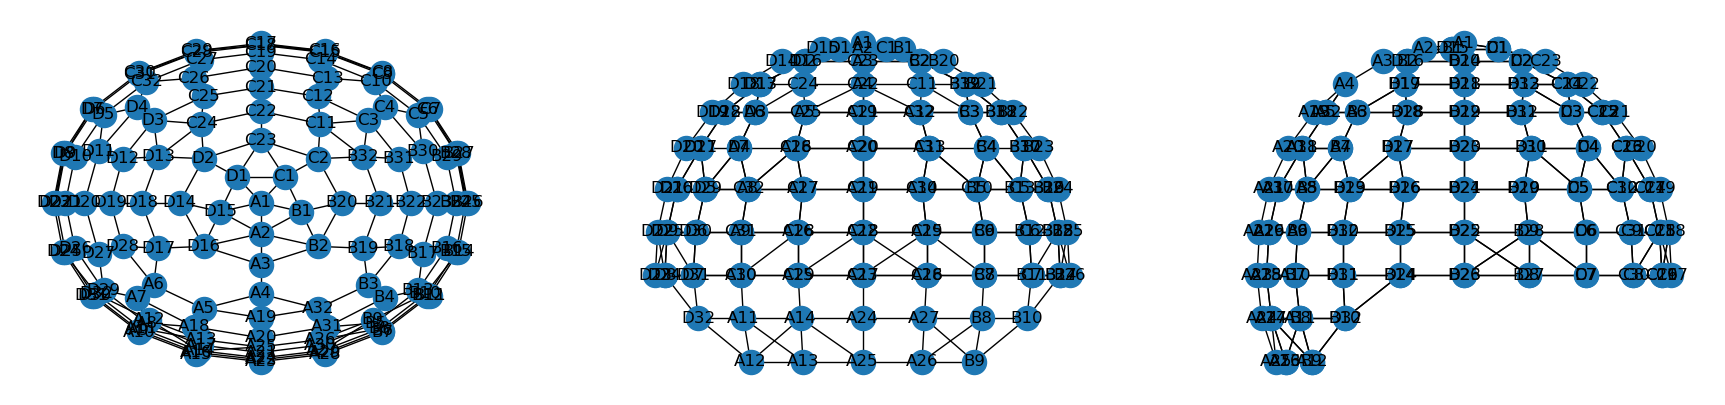

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (22,5))
nx.draw(G, pos=pos1,with_labels=True, ax=axs[0])
nx.draw(G, pos=pos2,with_labels=True, ax=axs[1])
nx.draw(G, pos=pos3,with_labels=True, ax=axs[2])


In [11]:
from torcheeg.datasets.constants.emotion_recognition import seed

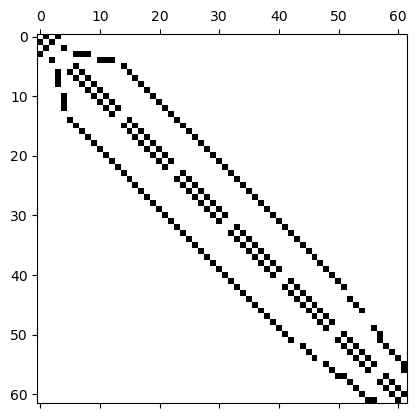

In [12]:
plt.spy(np.array(seed.SEED_ADJACENCY_MATRIX))

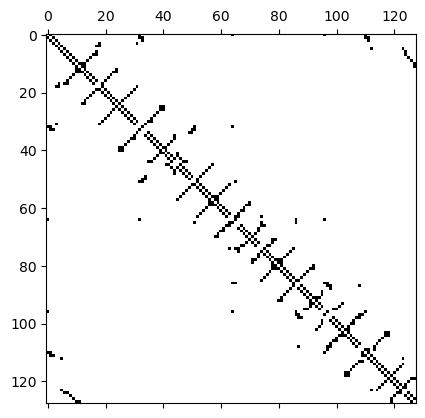

In [14]:
plt.spy(A)

In [15]:
np.save?

Signature: np.save(file, arr, allow_pickle=True, fix_imports=True)
Docstring:
Save an array to a binary file in NumPy ``.npy`` format.

Parameters
----------
file : file, str, or pathlib.Path
    File or filename to which the data is saved.  If file is a file-object,
    then the filename is unchanged.  If file is a string or Path, a ``.npy``
    extension will be appended to the filename if it does not already
    have one.
arr : array_like
    Array data to be saved.
allow_pickle : bool, optional
    Allow saving object arrays using Python pickles. Reasons for disallowing
    pickles include security (loading pickled data can execute arbitrary
    code) and portability (pickled objects may not be loadable on different
    Python installations, for example if the stored objects require libraries
    that are not available, and not all pickled data is compatible between
    Python 2 and Python 3).
    Default: True
fix_imports : bool, optional
    Only useful in forcing objects in obje

In [16]:
np.save('../utils/electrodes_adj', A)